In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from scipy.io.arff import loadarff

In [122]:
col = {
    "acc" : ["timestamp", "acc-x", "acc-y", "acc-z"],
    "gyro" : ["timestamp", "gyro-x", "gyro-y", "gyro-z"],
    "ori" : ["timestamp", "ori-x", "ori-y", "ori-z"]
}

df = pd.read_csv(f"../../../dataset/MobiAct/sub10/ADL/CSI/CSI_acc_10_1.txt", skiprows=16, names=col["acc"])

print(np.array(df).shape)
print(np.array(pd.read_csv("../../../dataset/MobiAct/sub11/ADL/CSI/CSI_acc_11_1.txt", skiprows=16, names=col["acc"])).shape)
print(np.array(pd.read_csv("../../../dataset/MobiAct/sub9/ADL/CSI/CSI_acc_9_1.txt", skiprows=16, names=col["acc"])).shape)
print(np.array(pd.read_csv(f"../../../dataset/MobiAct/sub9/ADL/CSI/CSI_gyro_9_1.txt", skiprows=16, names=col["gyro"], index_col=0)).shape)
print(np.array(pd.read_csv(f"../../../dataset/MobiAct/sub10/ADL/CSI/CSI_gyro_10_1.txt", skiprows=16, names=col["gyro"], index_col=0)).shape)
print(np.array(pd.read_csv("../../../dataset/MobiAct/sub11/ADL/CSI/CSI_gyro_11_1.txt", skiprows=16, names=col["gyro"], index_col=0)).shape)

# df = df.apply(lambda x: -1 + 2 * (x + 20) / 40)
df

(415, 4)
(473, 4)
(549, 4)
(1199, 3)
(1199, 3)
(1199, 3)


,timestamp,acc-x,acc-y,acc-z
0,3479037832000,-0.660800,9.662998,-2.221819
1,3479244074000,-0.823605,9.710882,-2.480393
2,3479444367000,-0.306458,9.509769,-2.336741
3,3479645112000,-0.038307,9.595961,-2.183512
4,3479845298000,-0.181959,9.442732,-2.480393
...,...,...,...,...
410,3484847536000,8.513782,2.116474,4.405331
411,3484857744000,8.542512,2.145205,4.424485
412,3484868741000,8.523358,2.116474,4.386177
413,3484878647000,8.523358,2.116474,4.386177


In [107]:
all = [2, 3, 4, 5, 7, 8, 9, 10, 11]
fold = ['CSI', 'CSO', 'JOG', 'JUM', 'SCH', 'STD', 'STN', 'STU', 'WAL']

def load_data(sub):
    df = np.array([[0, 0, 0]])
    for i in fold:
        df = np.r_[df, np.array(pd.read_csv(f"../../../dataset/MobiAct/sub{sub}/ADL/{i}/{i}_acc_{sub}_1.txt", skiprows=16, names=col["acc"], index_col=0))]
        df = np.r_[df, pd.read_csv(f"../../../dataset/MobiAct/sub{sub}/ADL/{i}/{i}_gyro_{sub}_1.txt", skiprows=16, names=col["gyro"], index_col=0)]
        df = np.r_[df, pd.read_csv(f"../../../dataset/MobiAct/sub{sub}/ADL/{i}/{i}_ori_{sub}_1.txt", skiprows=16, names=col["ori"], index_col=0)]
        print(df.shape)
    df = np.delete(df, 0, axis=0)
    return df.reshape(-1, 1, 9)

sub10 = load_data(10)

sns.countplot(x='label', data=sub10, order=sub10.label.value_counts().index)
pd.DataFrame(sub10)

(2808, 3)
(5756, 3)
(20596, 3)
(35436, 3)
(38335, 3)
(184269, 3)
(189142, 3)
(193936, 3)
(342344, 3)


ValueError: cannot reshape array of size 1027029 into shape (1,9)

In [98]:
col = df.columns.drop(['label'])

col

KeyError: "['label'] not found in axis"

In [6]:
df.dropna()

,AvgX,AvgY,AvgZ,MedianX,MedianY,MedianZ,StdX,StdY,StdZ,SkewX,...,AbsMaxZ,AbsSlope,MeanMag,StdMag,MinMag,MaxMag,DiffMinMaxMag,ZCR_Mag,AverageResultantAcceleration,label
0,7.079540,0.292400,3.763926,8.336310,-0.800637,4.799377,2.868003,4.616586,2.274586,-1.821233,...,12.732082,25.968431,99.065435,37.258635,29.541558,567.998312,538.456755,0,99.065435,BSC
1,7.173739,1.640782,4.361933,7.536947,1.973893,5.578871,2.253994,3.824003,2.581553,-1.826785,...,13.052741,28.237861,99.534564,41.252435,30.958310,514.237251,483.278940,0,99.534564,BSC
2,7.330632,2.381979,3.417897,8.192033,3.039308,4.317029,2.640936,4.069859,2.199644,-1.708481,...,10.945221,27.597204,99.455316,40.969060,20.501091,523.780867,503.279777,0,99.455316,BSC
3,-5.568553,-0.217635,6.616517,-6.148310,-0.676446,7.363430,2.473055,3.530614,1.962968,1.075171,...,18.426916,31.743260,97.257094,56.157126,2.593039,961.689593,959.096554,0,97.257094,BSC
4,-4.795033,0.358094,7.179030,-5.434174,0.013750,7.892242,2.168915,3.643256,2.230609,1.192495,...,19.105164,32.353318,97.600097,63.150734,2.032286,1033.791111,1031.758825,0,97.600097,BSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,1.634981,9.675176,0.571712,1.424729,9.680670,-0.137044,2.317456,3.162076,2.663163,0.984920,...,10.743226,22.767045,119.070444,77.191411,9.756531,526.605675,516.849143,0,119.070444,WAL
3290,0.024351,9.846186,0.012902,0.112443,9.820437,-0.388864,2.188469,3.014187,2.905252,-0.370210,...,16.535442,26.763433,119.262972,76.504228,0.654602,627.621581,626.966979,0,119.262972,WAL
3291,0.922415,9.858990,0.537263,0.838491,10.017472,-0.104868,2.124396,3.160946,3.103680,0.506166,...,16.363878,27.488127,122.476247,86.439565,5.432543,609.133832,603.701288,0,122.476247,WAL
3292,-0.194713,9.920477,0.347196,0.069789,9.875457,-0.178162,2.908753,2.944075,2.564336,-1.093212,...,16.409150,28.539022,122.278158,84.649215,6.421978,657.409980,650.988002,0,122.278158,WAL


<Axes: xlabel='label', ylabel='count'>

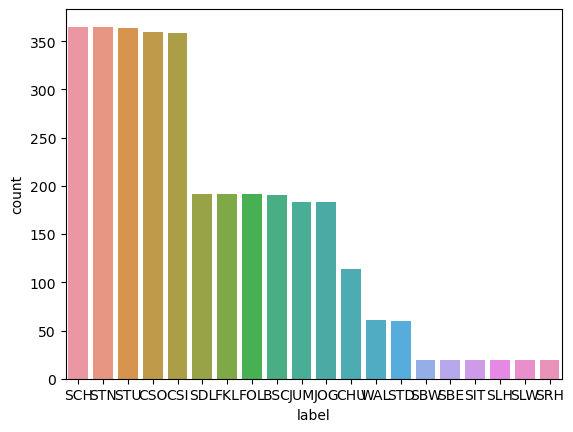

In [7]:
sns.countplot(x='label', data=df, order=df.label.value_counts().index)

In [8]:
from sklearn.preprocessing import StandardScaler

X = df[col]
y = df['label']
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = col)
scaled_X['label'] = pd.Series(y).values

X.shape, y.shape

((3294, 58), (3294,))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X,
                                                    scaled_X['label'],
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=42)

In [10]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train data label statistics::")
print(np.asarray((unique, counts)).T)

unique, counts = np.unique(y_test, return_counts=True)
print("Test data label statistics::")
print(np.asarray((unique, counts)).T)

Train data label statistics::
[['BSC' 134]
 ['CHU' 76]
 ['CSI' 256]
 ['CSO' 271]
 ['FKL' 140]
 ['FOL' 156]
 ['JOG' 137]
 ['JUM' 141]
 ['SBE' 15]
 ['SBW' 16]
 ['SCH' 278]
 ['SDL' 146]
 ['SIT' 9]
 ['SLH' 15]
 ['SLW' 16]
 ['SRH' 17]
 ['STD' 45]
 ['STN' 286]
 ['STU' 266]
 ['WAL' 50]]
Test data label statistics::
[['BSC' 57]
 ['CHU' 38]
 ['CSI' 102]
 ['CSO' 89]
 ['FKL' 52]
 ['FOL' 36]
 ['JOG' 46]
 ['JUM' 42]
 ['SBE' 4]
 ['SBW' 3]
 ['SCH' 87]
 ['SDL' 46]
 ['SIT' 10]
 ['SLH' 4]
 ['SLW' 3]
 ['SRH' 2]
 ['STD' 15]
 ['STN' 79]
 ['STU' 98]
 ['WAL' 11]]


In [11]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 1
STEP = 1

X_train, y_train = create_dataset(X_train[col], X_train.label, TIME_STEPS, STEP)
X_test, y_test = create_dataset(X_test[col], X_test.label, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

(2469, 1, 58) (2469, 1)


In [12]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

/Users/kimtaeyoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
pd.DataFrame(y_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2465,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2466,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2467,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional

In [16]:
model = Sequential([
    Bidirectional(LSTM(128, input_shape=[X_train.shape[1], X_train.shape[2]])),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])

In [17]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.33)

Epoch 1/20
52/52 [==============================] - 3s 17ms/step - loss: 1.9945 - accuracy: 0.4843 - f1_m: 0.1482 - precision_m: 0.5156 - recall_m: 0.0918 - val_loss: 1.0428 - val_accuracy: 0.7141 - val_f1_m: 0.5066 - val_precision_m: 0.9123 - val_recall_m: 0.3567
Epoch 2/20
52/52 [==============================] - 0s 4ms/step - loss: 0.9235 - accuracy: 0.7158 - f1_m: 0.6309 - precision_m: 0.8649 - recall_m: 0.5057 - val_loss: 0.6407 - val_accuracy: 0.8258 - val_f1_m: 0.8018 - val_precision_m: 0.9241 - val_recall_m: 0.7118
Epoch 3/20
52/52 [==============================] - 0s 4ms/step - loss: 0.6457 - accuracy: 0.7896 - f1_m: 0.7823 - precision_m: 0.8855 - recall_m: 0.7033 - val_loss: 0.5063 - val_accuracy: 0.8417 - val_f1_m: 0.8493 - val_precision_m: 0.9110 - val_recall_m: 0.7976
Epoch 4/20
52/52 [==============================] - 0s 5ms/step - loss: 0.5200 - accuracy: 0.8259 - f1_m: 0.8232 - precision_m: 0.8848 - recall_m: 0.7715 - val_loss: 0.4277 - val_accuracy: 0.8773 - val_f1_m:

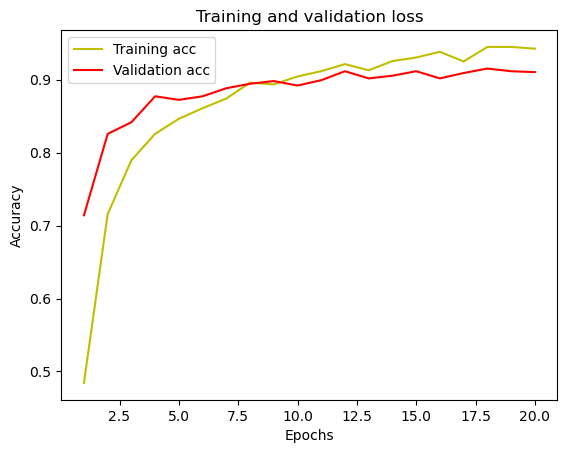

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
pd.DataFrame(y_test).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=1)

26/26 [==============================] - 0s 1ms/step - loss: 0.2509 - accuracy: 0.9174 - f1_m: 0.9163 - precision_m: 0.9208 - recall_m: 0.9121


In [21]:
f1_score

0.9162946939468384

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
y_test_arg = np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred))

26/26 [==============================] - 1s 1ms/step
Confusion Matrix
[[ 44   0   2   1   0   2   0   0   0   0   0   8   0   0   0   0   0   0
    0   0]
 [  0  37   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0 100   1   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0]
 [  0   2   0  87   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0  49   2   0   0   0   0   0   1   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   4  30   0   0   0   0   0   2   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0  41   4   0   0   0   0   0   0   0   0   0   0
    0   1]
 [  0   0   0   0   0   0   0  41   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   1   0   0
    0   0]
 [  0   0   1   0   0   0   0   0   0   0  86   0   0   0   0   0   0   0
    0 

## balanced data -> unbalanced model

In [24]:
def fit_label(female, male):
    id = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24, 0]
    fv = female.label.value_counts()
    mv = male.label.value_counts()
    for i in id:
        if ((i in fv.index) and (i in mv.index)):
            if (fv.loc[i] > mv.loc[i]): # i번째 feature에서 여자꺼가 더 많다면
                print(f"{i}-- female - male = {fv.loc[i] - mv.loc[i]} ===== female의 {i}번째 shape: {female[female['label'] == i].shape}")
                female[female['label'] == i] = female[female['label'] == i].drop(pd.DataFrame(female[female['label'] == i].index).tail(fv.loc[i] - mv.loc[i]).iloc[:, 0].values.tolist())
                print(f"{i}-- 완료(female 데이터 일부 제거) ===== male의 {i}번째 shape: {male[male['label'] == i].shape}, female의 {i}번째 shape: {female[female['label'] == i].shape}")
            else:
                print(f"{i}-- male - female = {mv.loc[i] - fv.loc[i]} ===== male의 {i}번째 shape: {male[male['label'] == i].shape}")
                male[male['label'] == i] = male[male['label'] == i].drop(pd.DataFrame(male[male['label'] == i].index).tail(mv.loc[i] - fv.loc[i]).iloc[:, 0].values.tolist())
                print(f"{i}-- 완료(male 데이터 일부 제거) ===== male의 {i}번째 shape: {male[male['label'] == i].shape}, female의 {i}번째 shape: {female[female['label'] == i].shape}")
        elif ((i in fv.index) and (i not in mv.index)):
            print(f"{i} 요소 제거")
            female[female['label'] == i] = female[female['label'] == i].drop(pd.DataFrame(female[female['label'] == i].index).iloc[:, 0].values.tolist())
        elif ((i not in fv.index) and (i in mv.index)):
            print(f"{i} 요소 제거")
            male[male['label'] == i] = male[male['label'] == i].drop(pd.DataFrame(male[male['label'] == i].index).iloc[:, 0].values.tolist())

    return female, male

/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_34132/2495676428.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female[female['activityID'] == 0] = female[female['activityID'] == 0].drop(pd.DataFrame(female[female['activityID'] == 0].index).iloc[:, 0].values.tolist())
/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_34132/3009957839.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male[male['activityID'] == i] = male[male['activityID'] == i].drop(pd.DataFrame(male[male['activit

1-- male - female = 887 ===== male의 1번째 shape: (24159, 55)
1-- 완료(male 데이터 일부 제거) ===== male의 1번째 shape: (23272, 55), female의 1번째 shape: (23272, 55)
2-- male - female = 576 ===== male의 2번째 shape: (22898, 55)
2-- 완료(male 데이터 일부 제거) ===== male의 2번째 shape: (22322, 55), female의 2번째 shape: (22322, 55)
3-- female - male = 347 ===== female의 3번째 shape: (25416, 55)
3-- 완료(female 데이터 일부 제거) ===== male의 3번째 shape: (25069, 55), female의 3번째 shape: (25069, 55)
4-- female - male = 1157 ===== female의 4번째 shape: (31500, 55)
4-- 완료(female 데이터 일부 제거) ===== male의 4번째 shape: (30343, 55), female의 4번째 shape: (30343, 55)
5-- male - female = 7419 ===== male의 5번째 shape: (16194, 55)
5-- 완료(male 데이터 일부 제거) ===== male의 5번째 shape: (8775, 55), female의 5번째 shape: (8775, 55)
6-- male - female = 635 ===== male의 6번째 shape: (25230, 55)
6-- 완료(male 데이터 일부 제거) ===== male의 6번째 shape: (24595, 55), female의 6번째 shape: (24595, 55)
7-- female - male = 31 ===== female의 7번째 shape: (28451, 55)
7-- 완료(female 데이터 일부 제거) ===== male의 7

/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_34132/3009957839.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male[male['activityID'] == i] = male[male['activityID'] == i].drop(pd.DataFrame(male[male['activityID'] == i].index).tail(mv.loc[i] - fv.loc[i]).iloc[:, 0].values.tolist())
/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_34132/3009957839.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male[male['activityID'] == i] = male[male['activityID'] == i].drop(pd.DataFrame(male[male['activityID'] == i].index).tail(mv.loc[i] - fv.l

24-- 완료(female 데이터 일부 제거) ===== male의 24번째 shape: (8467, 55), female의 24번째 shape: (8467, 55)
0 요소 제거


/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_34132/3009957839.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male[male['activityID'] == i] = male[male['activityID'] == i].drop(pd.DataFrame(male[male['activityID'] == i].index).iloc[:, 0].values.tolist())
/var/folders/hf/lrx32m9n0n7f1twmsv3x62gw0000gn/T/ipykernel_34132/3009957839.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male[male['activityID'] == i] = male[male['activityID'] == i].drop(pd.DataFrame(male[male['activityID'] == i].index).iloc[:, 0].values.tolist())


<Axes: xlabel='activityID', ylabel='count'>

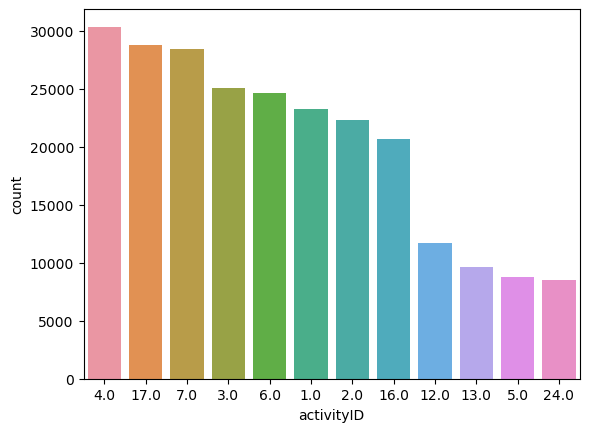

In [28]:
female = df[df['subject_id'] == 2]
male = df[df['subject_id'] == 8]

female[female['label'] == 0] = female[female['label'] == 0].drop(pd.DataFrame(female[female['label'] == 0].index).iloc[:, 0].values.tolist())

fv = female.label.value_counts()
mv = male.label.value_counts()
fv = fv.sort_index()
mv = mv.sort_index()

female, male = fit_label(female, male)
sns.countplot(x='label', data=female, order=female.label.value_counts().index)

<Axes: xlabel='activityID', ylabel='count'>

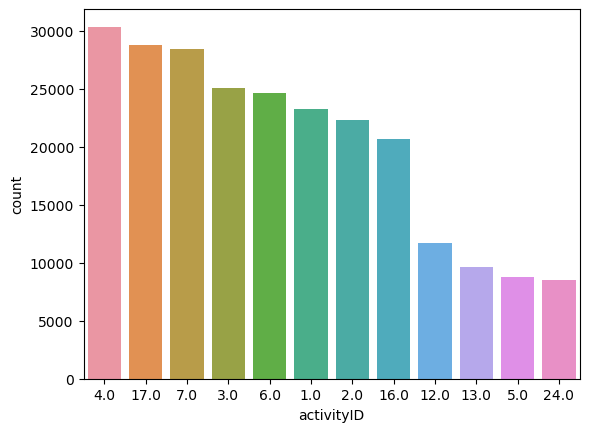

In [29]:
sns.countplot(x='activityID', data=male, order=male.activityID.value_counts().index)

In [30]:
female = female.dropna()
male = male.dropna()

female.shape, male.shape

((242065, 55), (242065, 55))

In [31]:
from sklearn.preprocessing import StandardScaler

X_b = np.concatenate([np.array(female[col]), np.array(male[col])])
y_b = np.concatenate([np.array(female['activityID']), np.array(male['activityID'])])
scaler = StandardScaler()
X_b = scaler.fit_transform(X_b)

scaled_X_b = pd.DataFrame(data = X_b, columns = col)
scaled_X_b['label'] = pd.Series(y_b).values

X_b.shape, y_b.shape

((484130, 36), (484130,))

In [32]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(scaled_X_b,
                                                                scaled_X_b['label'],
                                                                test_size=0.25,
                                                                shuffle=True,
                                                                random_state=42)

In [33]:
X_train_b, y_train_b = create_dataset(X_train_b[col], X_train_b.label, TIME_STEPS, STEP)
X_test_b, y_test_b = create_dataset(X_test_b[col], X_test_b.label, TIME_STEPS, STEP)

X_train_b.shape, y_train_b.shape

((363096, 1, 36), (363096, 1))

In [34]:
enc_b = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc_b = enc_b.fit(y_train_b)

y_test_b = enc.transform(y_test_b)

print(y_test_b.shape, y_test.shape)

(121032, 13) (711216, 13)


/Users/kimtaeyoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test_b, y_test_b, verbose=1)

3783/3783 [==============================] - 4s 1ms/step - loss: 0.4034 - accuracy: 0.8497 - f1_m: 0.8511 - precision_m: 0.8709 - recall_m: 0.8327


In [39]:
f1_score

0.8510598540306091

In [40]:
from sklearn.metrics import confusion_matrix

y_test_arg_b = np.argmax(y_test_b, axis=1)
y_pred_b = np.argmax(model.predict(X_test_b), axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg_b, y_pred_b))

3783/3783 [==============================] - 4s 1ms/step
Confusion Matrix
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  391 11113     0     0     0     0     0     0     0     0    21     0
      0]
 [  620     0  9748   381     0     1     0     3     2     0   168   147
      0]
 [  824     0     0 10923    22     0     0     0     0     0     9   876
      1]
 [ 3346     0     0     4  9395     2     4  2442    33    21    19     0
      1]
 [  161     0     0     0     9  4133     0    17     3     3     2     2
      5]
 [  450     0     0     0     0     2 11697     0    22    10   115    44
      2]
 [ 1002     0     9    10   170     1     1 13053    11    11    11    16
      5]
 [ 1872     8     0     0   118     5     0    44  3546    34   102     2
      5]
 [ 2147     0     0     6    37    15    11    49   205  2099   207    26
     31]
 [  651     0    11    60     1     3   102     6    45    13  9274   156
      2]
 [  143     0